In [1]:
from data_processing.neural_networks.DEEP_RL_Deep_Reinforcement_Learning.TRPO_module.TRPO_train import TRPO_train_wrap
from data_processing.neural_networks.DEEP_RL_Deep_Reinforcement_Learning.TRPO_module.TRPO_env import TRPO_env
import torch, matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import os
from IPython.display import clear_output
clear_output()

In [2]:
from gym_jiminy.envs import AntJiminyEnv
env = AntJiminyEnv(False)
env_params = {'id':'AntJiminyEnv'}

env_CP      = TRPO_env(env, device=device)
trainer     = TRPO_train_wrap(env_CP, actor_hidden=[32,32], critic_hidden = [32,32])
#trainer.init_train_params(eps_per_batch=5,endless=False, max_ep_len=4000)
base_path = os.path.join('data_processing', 'neural_networks', 'DEEP_RL_Deep_Reinforcement_Learning','TRPO_Module','cases','AntJiminyEnv')
case_name = env_params['id'] + '_32_32'
trainer.load_weights(case_name,base_path)

In [3]:
trainer.init_train_params(eps_per_batch=2,endless=True, max_ep_len=2000, critic_iters = 100)

In [12]:
trainer.delta = 0.05
trainer.eps_per_batch = 10
trainer.train(num_iters=15)
#trainer.save_weights(case_name,base_path)

100%|██████████| 15/15 [26:52<00:00, 107.49s/it, 1.avg_cum_reward_mean=4.68e+3, 2.avg_cum_reward_std=104, 3. step_len=0.8, evals=400]                           


In [13]:
trainer.save_weights(case_name,base_path)

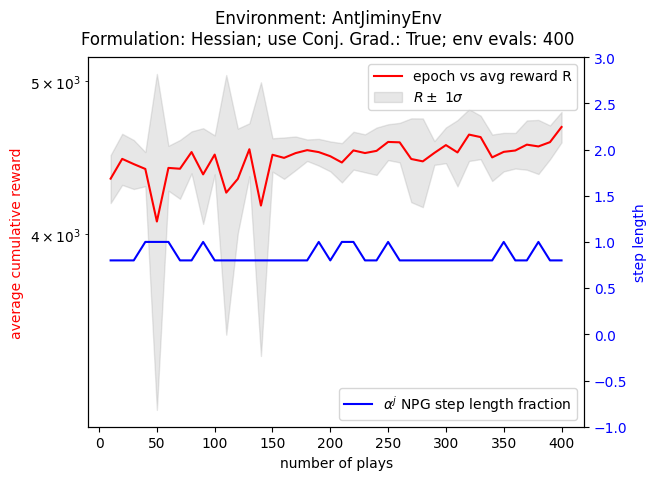

In [16]:
fig, ax1 = plt.subplots()
x = torch.tensor(trainer.progress_iters)
y1 = torch.tensor(trainer.progress)
y2 = torch.tensor(trainer.progress_std)
ax1.plot(x,y1, label='epoch vs avg reward R', c = 'r')    ;
ax1.fill_between(x, y1 - y2, y1 + y2, color='#888888', alpha=0.2, label='$R\pm$ 1$\sigma$')
ax1.set_xlabel(f'number of plays')
ax1.set_ylabel('average cumulative reward', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_yscale('log')
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.plot(x,trainer.step_lengths, c = 'b', label=r'$\alpha^j$ NPG step length fraction')
ax2.set_ylim(-1,3)

ax2.set_ylabel('step length', color='b') 
ax2.tick_params(axis='y', labelcolor='b')
ax1.legend()
ax2.legend(loc='lower right')
plt.suptitle(f"Environment: {env_params['id']}\nFormulation: {'Hessian' if not trainer.use_FIM else 'FIM'}; use Conj. Grad.: {trainer.use_CG }; env evals: {env_CP.env_iters}");
#plt.savefig(os.path.join(base_path,env_params['id']+'_32_32.png'))

In [17]:
terminated, truncated = False, False
observation, info = env.reset()
i = 0
while not (terminated or truncated):
    #action = env.action_space.sample()
    action =torch.as_tensor(observation, device=device, dtype = torch.float32)
    action = trainer.actor.get_action(action)
    observation, reward, terminated, truncated, info = env.step(action)
    i+= 1
    if i > 300: break
env.replay()

At least one of the robot is locked, which means that a simulation using the robot is still running. It will be impossible to display sensor data. Call `simulator.stop` to unlock the robot before replaying logs data.
Rendering frames: 100%|██████████| 452/452 [00:05<00:00, 84.33it/s] 
